In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as 
import re


In [0]:
exportdata = pd.read_csv(r"/content/drive/My Drive/SCM Dataset/2018-2010_export.csv")
importdata = pd.read_csv(r"/content/drive/My Drive/SCM Dataset/2018-2010_import.csv")

In [0]:
importdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [0]:
exportdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [0]:
importdata.isnull().sum()

HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

In [0]:
exportdata.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [0]:
print("Duplicate imports : "+str(importdata.duplicated().sum()))
print("Duplicate exports : "+str(exportdata.duplicated().sum()))

Duplicate imports : 18002
Duplicate exports : 0


In [0]:
print("Import Commodity Count : "+str(len(importdata['Commodity'].unique())))
print("Export Commodity Count : "+str(len(exportdata['Commodity'].unique())))

Import Commodity Count : 98
Export Commodity Count : 98


Before we proceed with Analysis and visualization process, we need to clear the dataset and do some basic calculations. We can start by removing the na or the missing values.

In [0]:
importdata=importdata.dropna()
importdata=importdata.reset_index(drop=True)

exportdata=exportdata.dropna()
exportdata=exportdata.reset_index(drop=True)


 Now with all the preprocessing done, we can go ahead with the calculations and visualization part. We can start off with the Year wise Import and Export trade deficit

In [0]:
importdatadeficit = importdata.groupby('year').agg({'value':'sum'})
exportdatadeficit = exportdata.groupby('year').agg({'value':'sum'})
exportdatadeficit[' Export Growth '] = exportdatadeficit.pct_change()
importdatadeficit['Import Growth '] = importdatadeficit.pct_change()
total = pd.concat([importdatadeficit, exportdatadeficit], axis = 1)
total['Deficit'] = exportdatadeficit.value - importdatadeficit.value
total

,value,Import Growth,value,Export Growth,Deficit
year,,,,,
2010,369762.25,NaN,249801.18,NaN,-119961.07
2011,489311.81,0.323315,305948.28,0.224767,-183363.53
2012,490730.07,0.002898,300384.32,-0.018186,-190345.75
2013,450192.99,-0.082606,314388.61,0.046621,-135804.38
2014,448026.63,-0.004812,310321.02,-0.012938,-137705.61
2015,412537.53,-0.079212,262274.30,-0.154829,-150263.23
2016,384350.29,-0.068326,275835.27,0.051705,-108515.02
2017,931148.04,1.422655,303507.85,0.100323,-627640.19
2018,1028142.66,0.104167,330058.64,0.087480,-698084.02


**Next we move on with the Country wise analysis**

In [0]:
importdatacountryvis = importdata.groupby('country').agg({'value':'sum'})
importdatacountryvis = importdatacountryvis.sort_values(by='value', ascending = False)
importdatacountryvis = importdatacountryvis[:10]

exportdatacountryvis = exportdata.groupby('country').agg({'value':'sum'})
exportdatacountryvis = exportdatacountryvis.sort_values(by='value', ascending = False)
exportdatacountryvis = exportdatacountryvis[:10]

In [0]:
exportdatacountryvis1 = exportdatacountryvis.rename(columns={'value': 'Export'})
exportdatacountryvis1

,Export
country,
U S A,360609.57
U ARAB EMTS,289374.88
CHINA P RP,121806.00
HONG KONG,115693.35
SINGAPORE,101679.70
U K,79942.61
GERMANY,68855.45
NETHERLAND,66581.17
SAUDI ARAB,65995.99


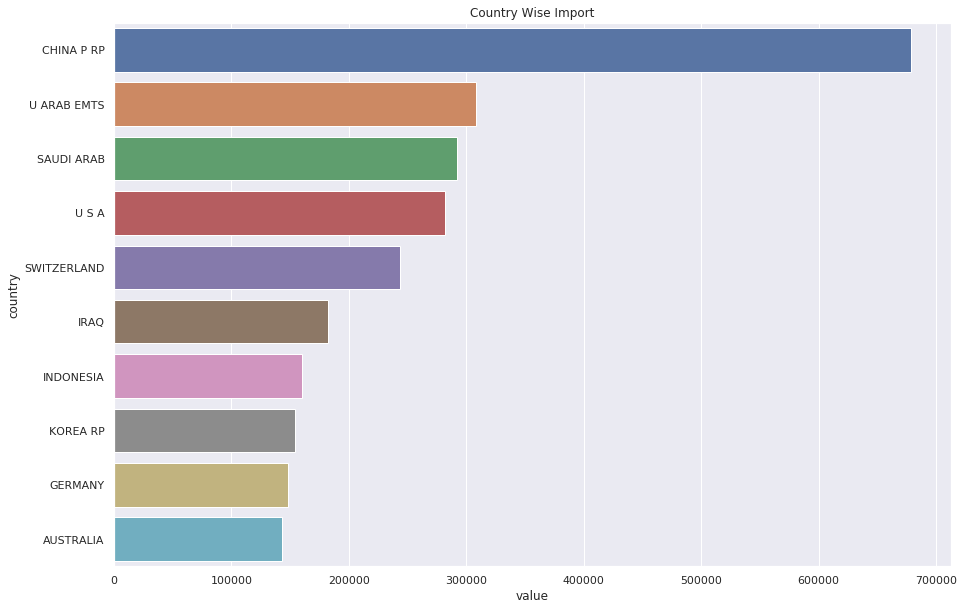

In [0]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(importdatacountryvis.value,importdatacountryvis.index).set_title('Country Wise Import')
plt.show()

In [0]:
importdatacountryvis1 = importdatacountryvis.rename(columns={'value': 'Import'})
importdatacountryvis1

,Import
country,
CHINA P RP,678877.15
U ARAB EMTS,307810.15
SAUDI ARAB,292104.09
U S A,281436.58
SWITZERLAND,243739.33
IRAQ,182464.57
INDONESIA,160452.65
KOREA RP,154263.94
GERMANY,148120.79


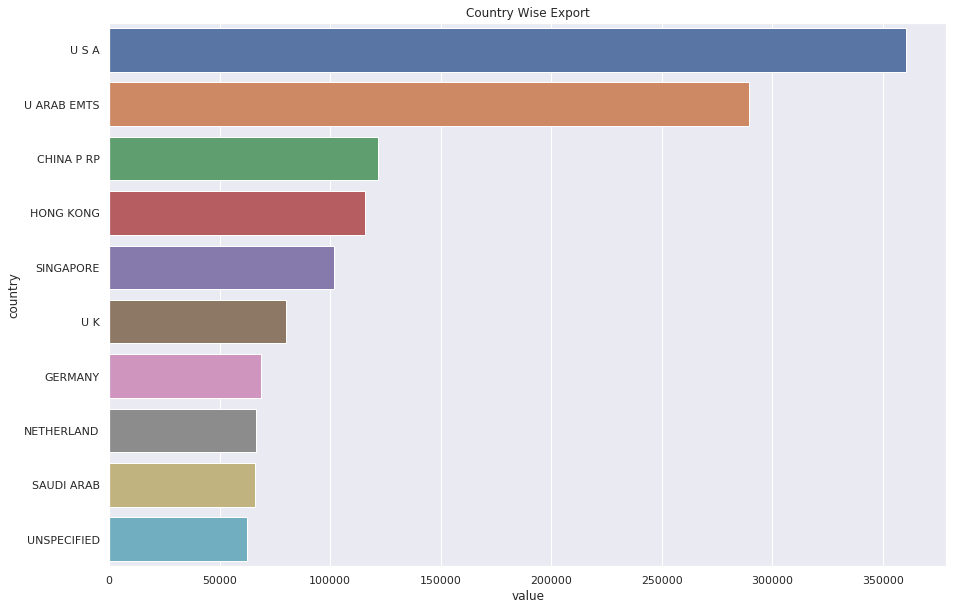

In [0]:
sns.barplot(exportdatacountryvis.value,exportdatacountryvis.index).set_title('Country Wise Export')
plt.show()

Now lets look at the visualizations for Commodity wise import and export

In [0]:
importdatacommodity = importdata.groupby('Commodity').agg({'value':'sum'})
importdatacommodity = importdatacommodity.sort_values(by='value', ascending = False)
importdatacommodity = importdatacommodity[:10]

exportdatacommodity = exportdata.groupby('Commodity').agg({'value':'sum'})
exportdatacommodity = exportdatacommodity.sort_values(by='value', ascending = False)
exportdatacommodity = exportdatacommodity[:10]


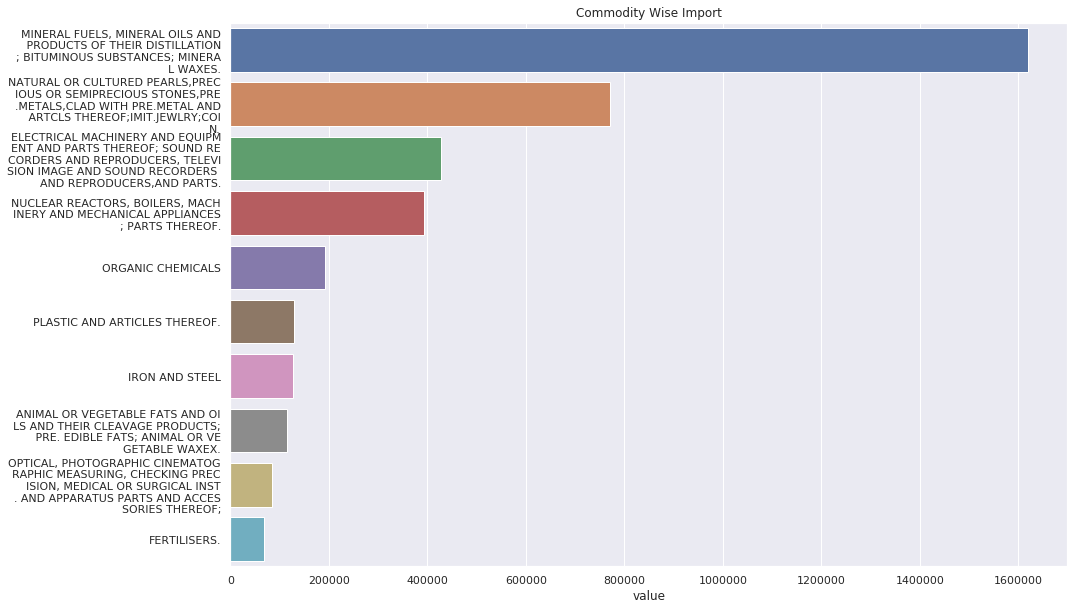

In [0]:
sns.set(rc={'figure.figsize':(15,10)})
ylabimp = importdatacommodity.index
labels_exp = [re.sub("(.{31})", "\\1\n", label, 0, re.DOTALL) for label in ylabimp]
sns.barplot(importdatacommodity.value, labels_exp).set_title('Commodity Wise Import')
plt.show()

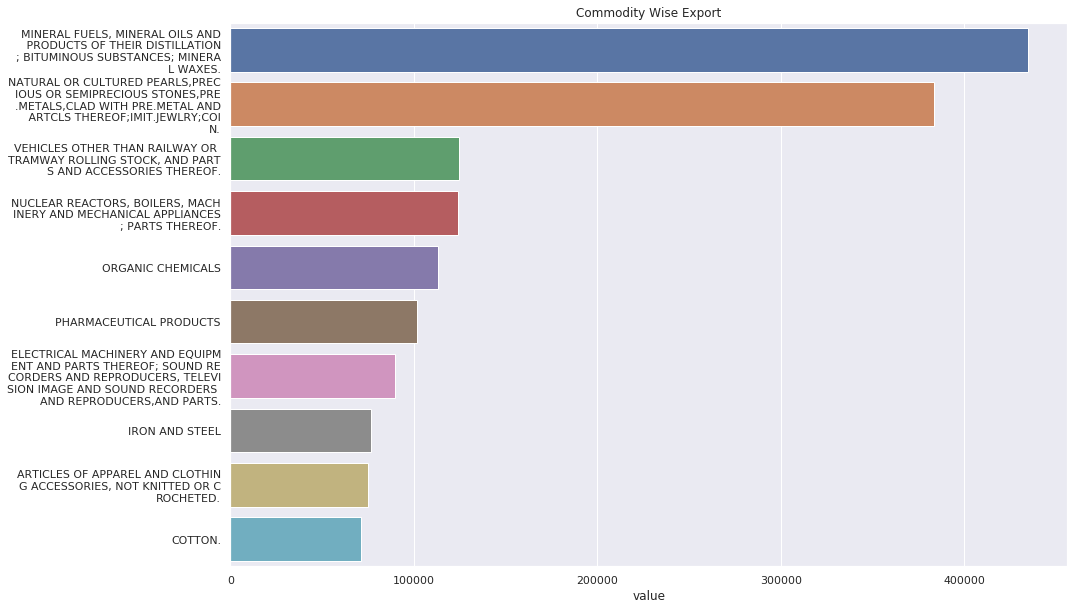

In [0]:
sns.set(rc={'figure.figsize':(15,10)})
ylabexp = exportdatacommodity.index
labels_exp = [re.sub("(.{31})", "\\1\n", label, 0, re.DOTALL) for label in ylabexp]
sns.barplot(exportdatacommodity.value,labels_exp).set_title('Commodity Wise Export')
plt.show()

Now with all the Visualizations done, we can go ahead with the calculations part. First let us consider the Import and Export transactions. 

In [0]:
import_gr=importdata.groupby(['country','year']).agg({'value':'sum'})
export_gr=exportdata.groupby(['country','year']).agg({'value':'sum'})
export_gr.groupby(['country'])
import_temp=import_gr.groupby(['country']).agg({'value':'sum'})
export_temp=export_gr.groupby(['country']).agg({'value':'sum'}).loc[import_temp.index.values]

data_1=import_gr.groupby(['country']).agg({'value':'sum'}).sort_values(by='value').tail(10)
data_2=export_temp
data_3=data_2-data_1
data_1.column=['Import']
data_2.column=['Export']
data_3.column=['Trade Deficit']

Transactions=pd.DataFrame(index=data_1.index.values, )
Transactions['Import']=data_1
Transactions['Export']=data_2
Transactions['Trade Deficit']=data_3
Transactions = Transactions.sort_values(by = 'Trade Deficit', ascending = False)
Transactions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,Import,Export,Trade Deficit
U S A,281436.58,360609.57,79172.99
U ARAB EMTS,307810.15,289374.88,-18435.27
GERMANY,148120.79,68855.45,-79265.34
KOREA RP,154263.94,38023.02,-116240.92
AUSTRALIA,142723.67,25372.29,-117351.38
INDONESIA,160452.65,42148.84,-118303.81
IRAQ,182464.57,9833.61,-172630.96
SAUDI ARAB,292104.09,65995.99,-226108.10
SWITZERLAND,243739.33,9992.56,-233746.77
CHINA P RP,678877.15,121806.00,-557071.15


In [0]:
exportdatacommodity

,value
Commodity,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",434594.81
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",383341.86
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",124502.75
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",123810.69
ORGANIC CHEMICALS,113008.98
PHARMACEUTICAL PRODUCTS,101792.69
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",89819.84
IRON AND STEEL,76597.96
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",75122.06


In [0]:
xlabels = exportdatacommodity.index

In [0]:
xlabel

Index(['MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.',
       'NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.',
       'VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.',
       'NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.',
       'ORGANIC CHEMICALS', 'PHARMACEUTICAL PRODUCTS',
       'ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.',
       'IRON AND STEEL',
       'ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.',
       'COTTON.'],
      dtype='object', name='Commodity')

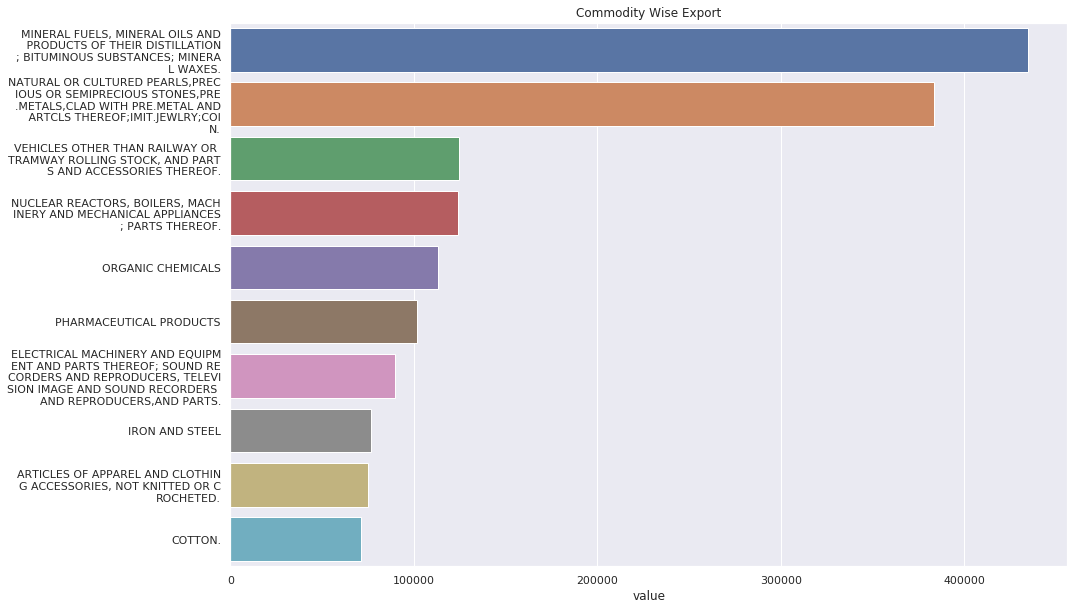

In [0]:
sns.barplot(exportdatacommodity.value,xlabels_new).set_title('Commodity Wise Export')
plt.show()